# INSY 662 - Gov Budget Allocation

## Dataset:
http://nfdp.ccfm.org/en/data/revenues.php

revenue.csv

In [16]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('Data_Gov_Revenue.csv', sep='\t', encoding='utf-16')
data.head()

,Jurisdiction,Year,Value (dollars)
0,Manitoba,2020,0
1,New Brunswick,2020,0
2,British Columbia,2020,0
3,Newfoundland and Labrador,2020,0
4,Nova Scotia,2020,0


In [3]:
# Category Counts
categorical_columns = ['Jurisdiction', 'Year']
for col in categorical_columns:
    print(f'\nFrequency of categories in {col}:\n', data[col].value_counts())



Frequency of categories in Jurisdiction:
 Manitoba                     8
New Brunswick                8
British Columbia             8
Newfoundland and Labrador    8
Nova Scotia                  8
Northwest Territories        8
Ontario                      8
Quebec                       8
Saskatchewan                 8
Prince Edward Island         8
Alberta                      8
Yukon                        8
Name: Jurisdiction, dtype: int64

Frequency of categories in Year:
 2020    96
Name: Year, dtype: int64


In [4]:
revenue = pd.read_csv('./revenue.csv',encoding='ISO-8859-1')
revenue.head()

,Year,Année,ISO,Juridiction,Revenues,Revenus,Value (dollars),Data qualifier,Valeur (en dollar),Qualificatifs de données,Jurisdiction
0,2003,2003,NL,Terre-Neuve-et-Labrador,Area/holding charges,Droits de location ou de jouissance,0.0,a,0.0,a,Newfoundland and Labrador
1,2003,2003,NL,Terre-Neuve-et-Labrador,"Other (bonuses, penalties, interest charges)","Autres (suppléments, amendes, frais d'intérêts)",3000.0,a,3000.0,a,Newfoundland and Labrador
2,2003,2003,NL,Terre-Neuve-et-Labrador,Protection fees,Coût de protection du territoire,0.0,a,0.0,a,Newfoundland and Labrador
3,2003,2003,NL,Terre-Neuve-et-Labrador,Permit and licence fees (export fees),Permis et frais de tenure (frais d'exportation),539000.0,a,539000.0,a,Newfoundland and Labrador
4,2003,2003,NL,Terre-Neuve-et-Labrador,Sales and rentals,Ventes et locations,0.0,a,0.0,a,Newfoundland and Labrador


In [5]:
# Drop cols that we dont need
cols = ['Année', 'Revenus', 'Juridiction', 'Valeur (en dollar)', 'Qualificatifs de données']
revenue_cleaned = revenue.drop(columns=cols)
#revenue_cleaned = revenue_cleaned[revenue_cleaned['Year'] >= 2015]
revenue_cleaned.head()

,Year,ISO,Revenues,Value (dollars),Data qualifier,Jurisdiction
0,2003,NL,Area/holding charges,0.0,a,Newfoundland and Labrador
1,2003,NL,"Other (bonuses, penalties, interest charges)",3000.0,a,Newfoundland and Labrador
2,2003,NL,Protection fees,0.0,a,Newfoundland and Labrador
3,2003,NL,Permit and licence fees (export fees),539000.0,a,Newfoundland and Labrador
4,2003,NL,Sales and rentals,0.0,a,Newfoundland and Labrador


In [6]:
summary_stats = revenue_cleaned.describe(include='all')
summary_stats

,Year,ISO,Revenues,Value (dollars),Data qualifier,Jurisdiction
count,2848.000000,2848,2848,2.432000e+03,2848,2848
unique,NaN,12,8,NaN,8,12
top,NaN,NL,Area/holding charges,NaN,a,Newfoundland and Labrador
freq,NaN,240,356,NaN,2063,240
mean,2004.337079,NaN,NaN,1.741363e+07,NaN,NaN
std,8.567105,NaN,NaN,1.170488e+08,NaN,NaN
min,1990.000000,NaN,NaN,-4.745700e+07,NaN,NaN
25%,1997.000000,NaN,NaN,0.000000e+00,NaN,NaN
50%,2004.000000,NaN,NaN,7.000000e+03,NaN,NaN
75%,2012.000000,NaN,NaN,6.040000e+05,NaN,NaN


In [7]:
# Category Counts
categorical_columns = ['ISO', 'Jurisdiction']
for col in categorical_columns:
    print(f'\nFrequency of categories in {col}:\n', revenue_cleaned[col].value_counts())



Frequency of categories in ISO:
 NL    240
PE    240
NS    240
ON    240
MB    240
SK    240
AB    240
NT    240
QC    232
NB    232
BC    232
YT    232
Name: ISO, dtype: int64

Frequency of categories in Jurisdiction:
 Newfoundland and Labrador    240
Prince Edward Island         240
Nova Scotia                  240
Ontario                      240
Manitoba                     240
Saskatchewan                 240
Alberta                      240
Northwest Territories        240
Quebec                       232
New Brunswick                232
British Columbia             232
Yukon                        232
Name: Jurisdiction, dtype: int64


In [8]:
revenue_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             2848 non-null   int64  
 1   ISO              2848 non-null   object 
 2   Revenues         2848 non-null   object 
 3   Value (dollars)  2432 non-null   float64
 4   Data qualifier   2848 non-null   object 
 5   Jurisdiction     2848 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 133.6+ KB


In [9]:
# Is there any Null values?
revenue_cleaned.isnull().sum()

Year                 0
ISO                  0
Revenues             0
Value (dollars)    416
Data qualifier       0
Jurisdiction         0
dtype: int64

In [10]:
# Group the data by 'Jurisdiction' and find out the missing values for 'Value (dollars)' in each group
missing_values_by_jurisdiction = revenue_cleaned[revenue_cleaned['Value (dollars)'].isnull()].groupby('Jurisdiction').size()

# Display the count of missing values by jurisdiction
missing_values_by_jurisdiction


Jurisdiction
Alberta                       74
British Columbia             116
Manitoba                      10
New Brunswick                 18
Newfoundland and Labrador     46
Northwest Territories        113
Ontario                        5
Prince Edward Island           3
Quebec                        12
Saskatchewan                   4
Yukon                         15
dtype: int64

In [11]:
# Replace missing values with the median for each jurisdiction
for jurisdiction in revenue_cleaned['Jurisdiction'].unique():
    median_value = revenue_cleaned[revenue_cleaned['Jurisdiction'] == jurisdiction]['Value (dollars)'].median()
    revenue_cleaned.loc[(revenue_cleaned['Jurisdiction'] == jurisdiction) & (revenue_cleaned['Value (dollars)'].isnull()), 'Value (dollars)'] = median_value

# Check if there are any remaining null values in 'Value (dollars)'
remaining_nulls = revenue_cleaned['Value (dollars)'].isnull().sum()
remaining_nulls

0

# Visualizations

### Create individual line plots for each Jurisdiction

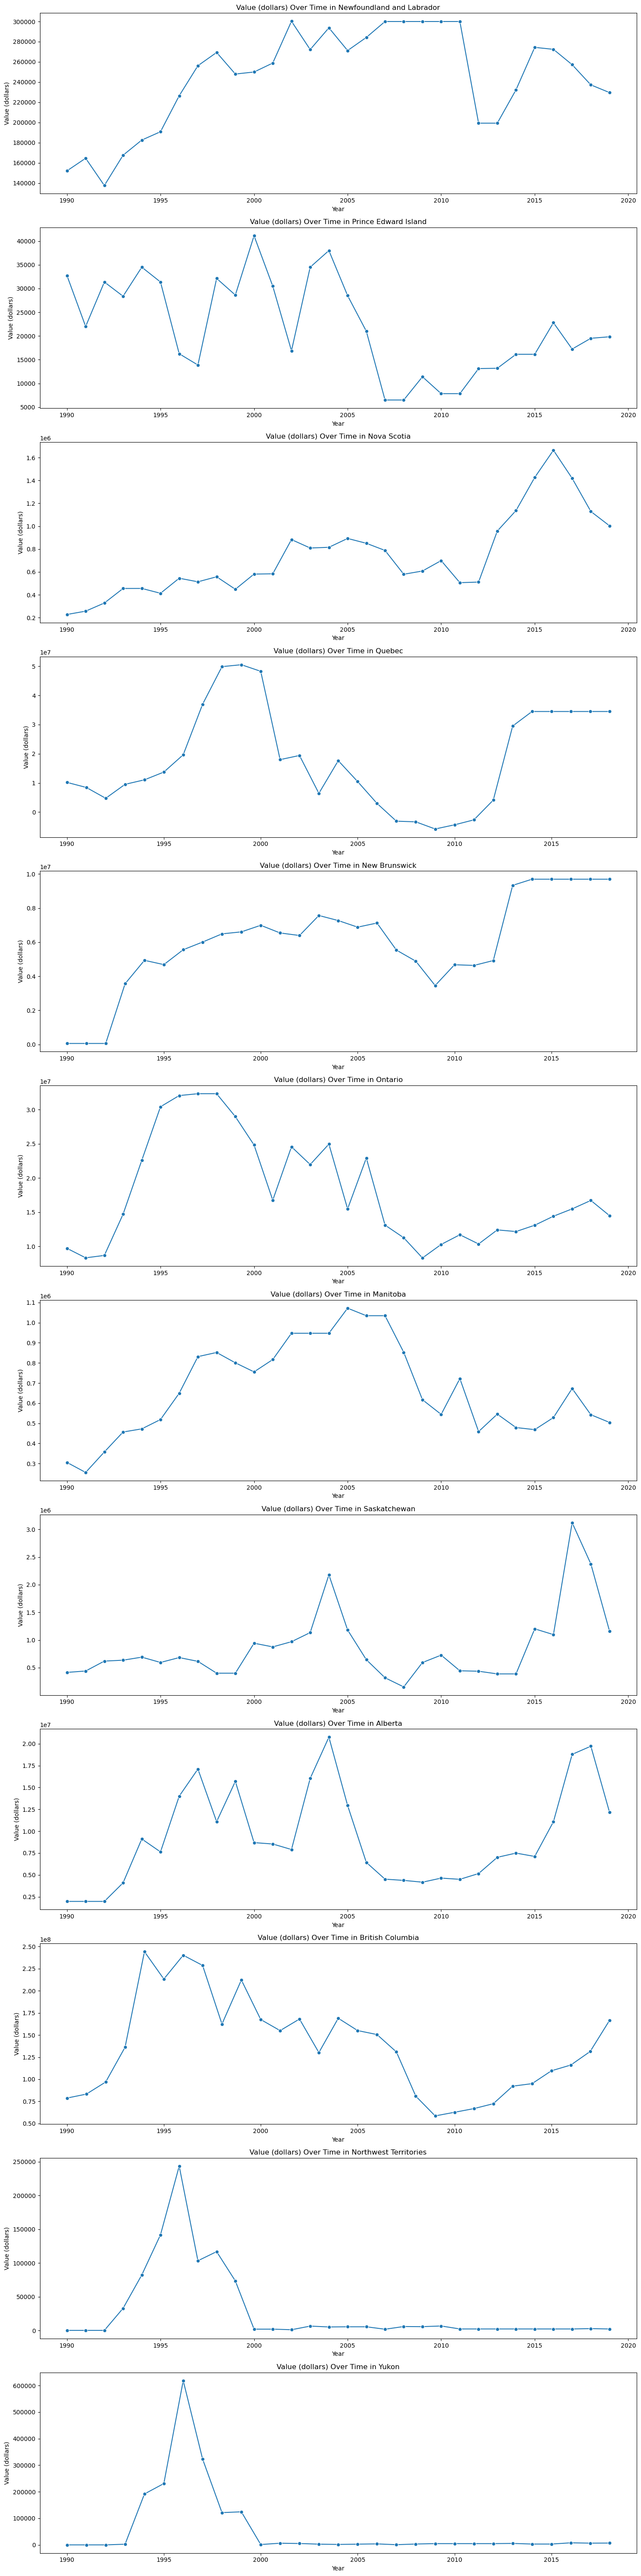

In [17]:
# Define 'jurisdictions' variable
jurisdictions = revenue_cleaned['Jurisdiction'].unique()

# Set plot size
plt.figure(figsize=(15, 5 * len(jurisdictions)))

# Create a plot for each jurisdiction
for i, jurisdiction in enumerate(jurisdictions, 1):
    plt.subplot(len(jurisdictions), 1, i)
    sns.lineplot(
        data=revenue_cleaned[revenue_cleaned['Jurisdiction'] == jurisdiction],
        x='Year',
        y='Value (dollars)',
        marker='o',
        ci=None  # Removes the confidence interval
    )
    plt.title(f'Value (dollars) Over Time in {jurisdiction}')
    plt.xlabel('Year')
    plt.ylabel('Value (dollars)')
    plt.tight_layout()

plt.show()

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define 'jurisdictions' variable
jurisdictions = revenue_cleaned['Jurisdiction'].unique()

# Directory to save the plots
save_directory = '/Users/sheidamajidi/Desktop/Fall2023Courses/INSY662/Group Project/Charts/Revenue/' 

# Create and save a plot for each jurisdiction
for i, jurisdiction in enumerate(jurisdictions, 1):
    # Set up the plot for the current jurisdiction
    plt.figure(figsize=(15, 5))
    sns.lineplot(
        data=revenue_cleaned[revenue_cleaned['Jurisdiction'] == jurisdiction],
        x='Year',
        y='Value (dollars)',
        marker='o',
        ci=None  # Removes the confidence interval
    )
    plt.title(f'Value (dollars) Over Time in {jurisdiction}')
    plt.xlabel('Year')
    plt.ylabel('Value (dollars)')
    plt.tight_layout()
    
    # Save the current figure
    plot_filename = f"{save_directory}Value_over_time_{jurisdiction}.png" 
    plt.savefig(plot_filename)
    
    # Close the current plot before creating the next one
    plt.close()


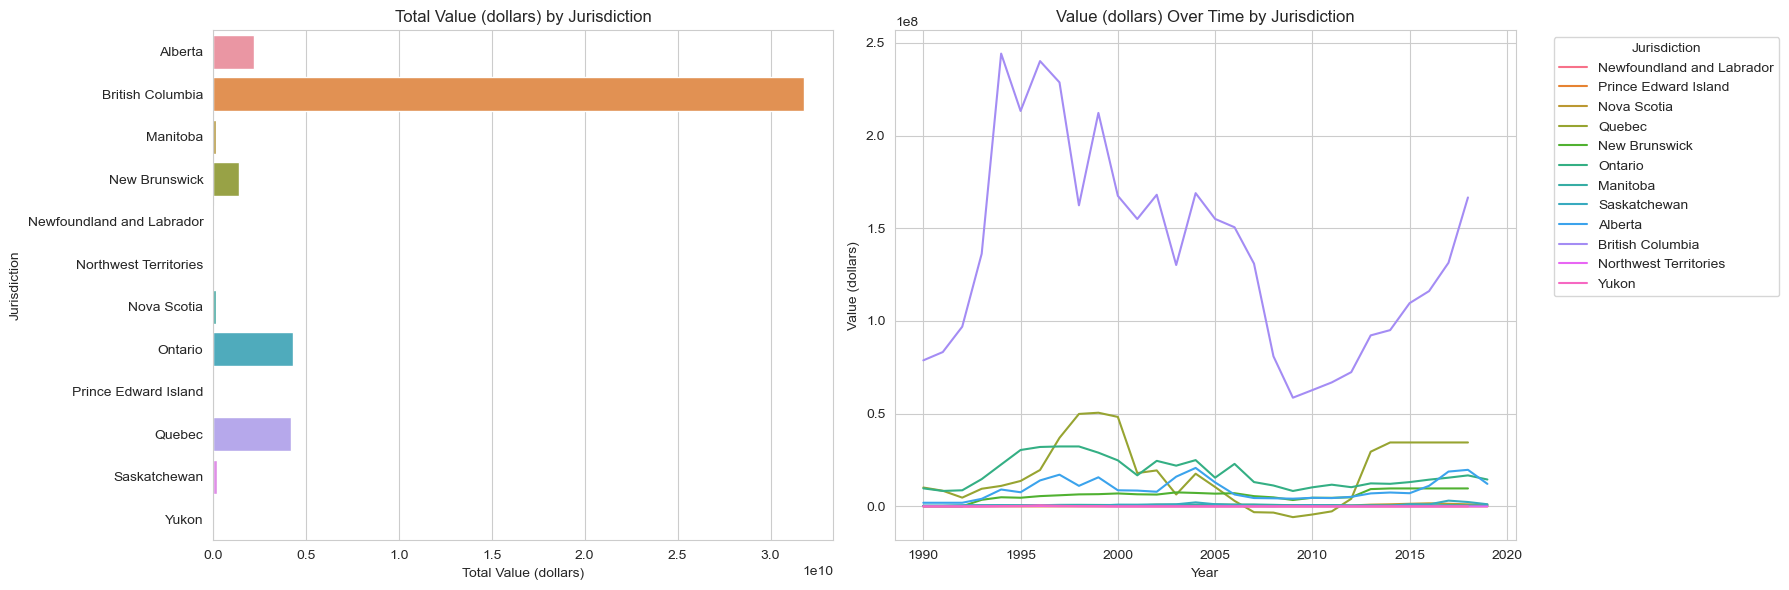

In [18]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot 1: Total Value (dollars) allocated to each Jurisdiction
sns.barplot(x='Value (dollars)', y='Jurisdiction', data=revenue_cleaned.groupby('Jurisdiction')['Value (dollars)'].sum().reset_index(), ax=axes[0])
axes[0].set_title('Total Value (dollars) by Jurisdiction')
axes[0].set_xlabel('Total Value (dollars)')
axes[0].set_ylabel('Jurisdiction')

# Plot 2: Value (dollars) changing over the Years for each Jurisdiction
# Remove the confidence interval with ci=None
sns.lineplot(x='Year', y='Value (dollars)', hue='Jurisdiction', data=revenue_cleaned, ax=axes[1], ci=None)
axes[1].set_title('Value (dollars) Over Time by Jurisdiction')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Value (dollars)')
axes[1].legend(title='Jurisdiction', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()

plt.show()


## Plots description:

### 1. Total Value (dollars) by Jurisdiction: 

A bar chart displaying the total 'Value (dollars)' for each jurisdiction. This gives a clear comparison of the total revenue across different areas.

### 2. Value (dollars) Over Time by Jurisdiction: 

A line chart depicting the changes in 'Value (dollars)' over the years for each jurisdiction, without the shaded confidence intervals. This plot provides a direct view of how the revenue values have evolved over time in each jurisdiction, focusing solely on the mean trends.

## Pie Chart

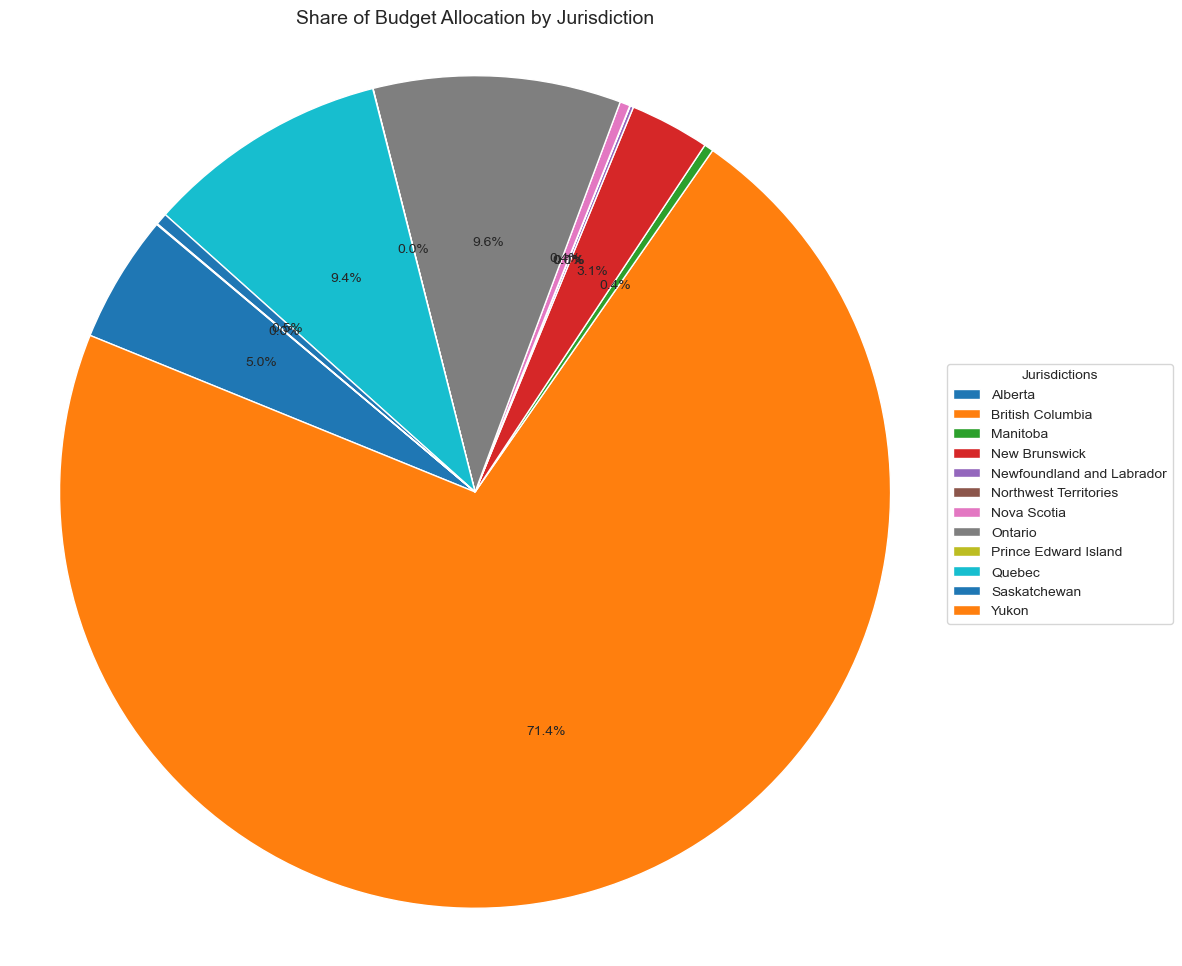

In [21]:
import matplotlib.pyplot as plt

# Calculate the total value for each jurisdiction
total_values_by_jurisdiction = revenue_cleaned.groupby('Jurisdiction')['Value (dollars)'].sum()

# Create the pie chart with labels removed from the pie slices
plt.figure(figsize=(12, 12))  # Increased figure size for better readability
labels = total_values_by_jurisdiction.index
plt.pie(total_values_by_jurisdiction, autopct='%1.1f%%', startangle=140)
plt.title('Share of Budget Allocation by Jurisdiction', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend for clarity
plt.legend(labels, title="Jurisdictions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


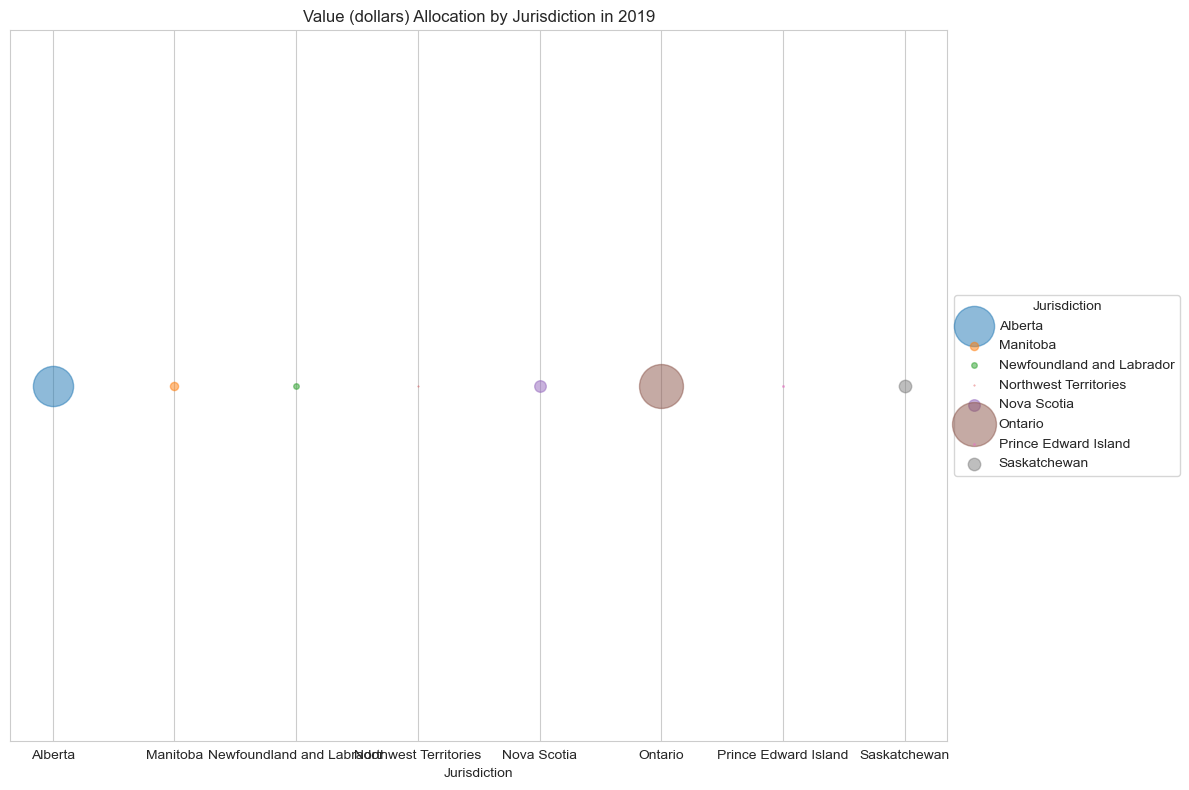

In [27]:
# Filter the data for the year 2020
data_2020 = revenue_cleaned[revenue_cleaned['Year'] == 2019]

# Get the total value for each jurisdiction in 2020
values_by_jurisdiction_2020 = data_2020.groupby('Jurisdiction')['Value (dollars)'].sum()

# Create the bubble chart
plt.figure(figsize=(12, 8))

# The size of each bubble will be proportional to the 'Value (dollars)'
# Adjust the scaling factor as needed
bubble_sizes = values_by_jurisdiction_2020 / values_by_jurisdiction_2020.max() * 1000  

for jurisdiction, size in bubble_sizes.items():
    plt.scatter(
        [jurisdiction],  # x-coordinates for scatter plot
        [0],  # y-coordinates for scatter plot, all zeros to align horizontally
        s=size,  # size of the bubble
        alpha=0.5,
        label=str(jurisdiction)  # Ensure the label is a string to be displayed in the legend
    )

# Adjust the y-axis since all points will be on the same y position
plt.yticks([])  # Hide y-axis ticks

plt.title('Value (dollars) Allocation by Jurisdiction in 2019')
plt.xlabel('Jurisdiction')

# The legend is created outside the plot area to prevent overlap with bubbles
plt.legend(title="Jurisdiction", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


## Heat map (after 2015)

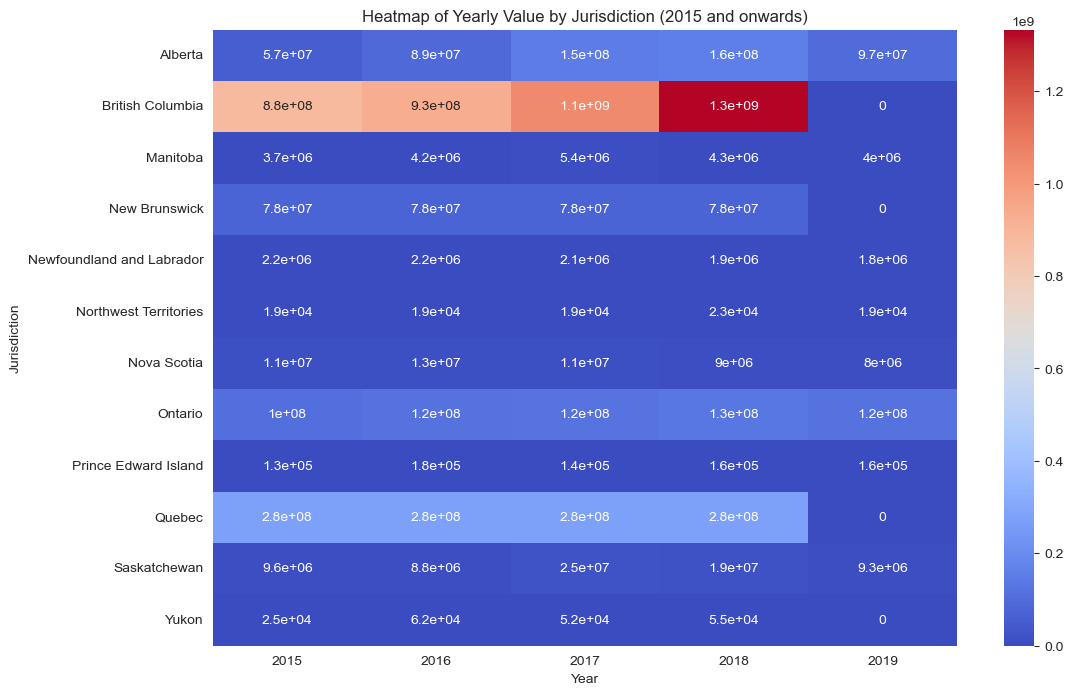

In [28]:
# Narrowing down the data for the heatmap to years >= 2015

# Filtering the data
filtered_data = revenue_cleaned[revenue_cleaned['Year'] >= 2015]

# Pivot data for heatmap
heatmap_data = filtered_data.pivot_table(index='Jurisdiction', columns='Year', values='Value (dollars)', aggfunc='sum', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Yearly Value by Jurisdiction (2015 and onwards)')
plt.xlabel('Year')
plt.ylabel('Jurisdiction')
plt.show()


## fire_data_cleaned dataset :

In [29]:
data = pd.read_csv('../fire_data_cleaned.csv',encoding='ISO-8859-1')
data.head()

,FID,SRC_AGENCY,FIRE_ID,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,OUT_DATE,SIZE_HA,CAUSE,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM
0,187640,AB,MWF036,59.122133,-111.158783,2015,6,6,2015-06-06 00:00:00,2015-06-06 00:00:00,0.01,L,5,5a,Taiga Shield West,Taiga du Bouclier
1,187641,AB,MWF052,59.653100,-110.343233,2015,6,24,2015-06-24 00:00:00,2015-11-12 00:00:00,24458.00,L,5,5a,Taiga Shield West,Taiga du Bouclier
2,187642,AB,MWF054,59.081333,-110.849717,2015,6,24,2015-06-24 00:00:00,2015-06-24 00:00:00,0.01,L,5,5a,Taiga Shield West,Taiga du Bouclier
3,187643,AB,MWF055,59.353500,-110.506667,2015,6,24,2015-06-24 00:00:00,2015-06-24 00:00:00,0.10,L,5,5a,Taiga Shield West,Taiga du Bouclier
4,187644,AB,MWF058,59.044483,-110.816367,2015,6,24,2015-06-24 00:00:00,2015-06-24 00:00:00,0.01,L,5,5a,Taiga Shield West,Taiga du Bouclier


In [30]:
summary_stats = data.describe(include='all')
summary_stats

,FID,SRC_AGENCY,FIRE_ID,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,OUT_DATE,SIZE_HA,CAUSE,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM
count,24596.000000,24596,24596,24596.000000,24596.000000,24596.000000,24596.000000,24596.000000,24596,24596,24596.000000,24596,24596.000000,24596,24596,24596
unique,NaN,10,15379,NaN,NaN,NaN,NaN,NaN,1615,1629,NaN,3,NaN,16,16,14
top,NaN,AB,PET1,NaN,NaN,NaN,NaN,NaN,2015-06-26 00:00:00,2015-05-18 00:00:00,NaN,H,NaN,9,Boreal PLain,Bouclier bordal
freq,NaN,5835,10,NaN,NaN,NaN,NaN,NaN,203,128,NaN,13400,NaN,6694,6694,11105
mean,290288.418767,NaN,NaN,52.037379,-94.503564,2017.508863,6.332656,16.135835,NaN,NaN,410.737730,NaN,7.257887,NaN,NaN,NaN
std,74674.756130,NaN,NaN,4.852209,19.301428,1.974909,1.511872,8.876843,NaN,NaN,5681.296425,NaN,2.132863,NaN,NaN,NaN
min,187640.000000,NaN,NaN,42.915700,-140.984333,2015.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,216856.000000,NaN,NaN,47.850000,-112.421683,2016.000000,5.000000,8.000000,NaN,NaN,0.100000,NaN,6.000000,NaN,NaN,NaN
50%,317321.500000,NaN,NaN,51.483851,-94.919150,2017.000000,6.000000,17.000000,NaN,NaN,0.200000,NaN,6.000000,NaN,NaN,NaN
75%,367935.250000,NaN,NaN,55.522308,-77.648625,2019.000000,7.000000,24.000000,NaN,NaN,1.800000,NaN,9.000000,NaN,NaN,NaN


In [31]:
# Modifications for categories:

# Narrowing down to just provinces 
mask = data['SRC_AGENCY'].str.startswith('PC')
fire_data = data[~mask]

# Keep 3 causes of H (Human), L(Lighting), U(Unknown) - get rid of H-PB
data = fire_data[fire_data['CAUSE'] != 'H-PB']


data.shape
data.head()

,FID,SRC_AGENCY,FIRE_ID,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,OUT_DATE,SIZE_HA,CAUSE,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM
0,187640,AB,MWF036,59.122133,-111.158783,2015,6,6,2015-06-06 00:00:00,2015-06-06 00:00:00,0.01,L,5,5a,Taiga Shield West,Taiga du Bouclier
1,187641,AB,MWF052,59.653100,-110.343233,2015,6,24,2015-06-24 00:00:00,2015-11-12 00:00:00,24458.00,L,5,5a,Taiga Shield West,Taiga du Bouclier
2,187642,AB,MWF054,59.081333,-110.849717,2015,6,24,2015-06-24 00:00:00,2015-06-24 00:00:00,0.01,L,5,5a,Taiga Shield West,Taiga du Bouclier
3,187643,AB,MWF055,59.353500,-110.506667,2015,6,24,2015-06-24 00:00:00,2015-06-24 00:00:00,0.10,L,5,5a,Taiga Shield West,Taiga du Bouclier
4,187644,AB,MWF058,59.044483,-110.816367,2015,6,24,2015-06-24 00:00:00,2015-06-24 00:00:00,0.01,L,5,5a,Taiga Shield West,Taiga du Bouclier


In [32]:
# Category Counts (fire_data)
categorical_columns = ['SRC_AGENCY', 'CAUSE', 'ECOZ_NAME', 'ECOZ_NOM']
for col in categorical_columns:
    print(f'\nFrequency of categories in {col}:\n', data[col].value_counts())



Frequency of categories in SRC_AGENCY:
 AB    5835
ON    5765
QC    3583
SK    2990
MB    2123
NB    1859
NT    1033
NS     516
NL     489
YT     403
Name: SRC_AGENCY, dtype: int64

Frequency of categories in CAUSE:
 H    13400
L    10602
U      594
Name: CAUSE, dtype: int64

Frequency of categories in ECOZ_NAME:
 Boreal PLain          6694
Boreal Shield West    6138
Boreal Shield East    4967
Atlantic Maritime     2817
Taiga Plain           1105
Taiga Shield West      716
Montane Cordillera     632
MixedWood Plain        422
Prairie                305
Boreal Cordillera      299
Hudson Plain           232
Taiga Shield East      153
Taiga Cordillera        98
Southern Arctic         15
                         2
Northern Arctic          1
Name: ECOZ_NAME, dtype: int64

Frequency of categories in ECOZ_NOM:
 Bouclier bordal             11105
Plaines bornales             6694
Maritime de l'Atlantique     2817
Taiga des plaines            1105
Taiga du Bouclier             869
Cordill re m

In [33]:
# Is there any Null values?
data.isnull().sum()

FID           0
SRC_AGENCY    0
FIRE_ID       0
LATITUDE      0
LONGITUDE     0
YEAR          0
MONTH         0
DAY           0
REP_DATE      0
OUT_DATE      0
SIZE_HA       0
CAUSE         0
ECOZONE       0
ECOZ_REF      0
ECOZ_NAME     0
ECOZ_NOM      0
dtype: int64

## cause of fire plot

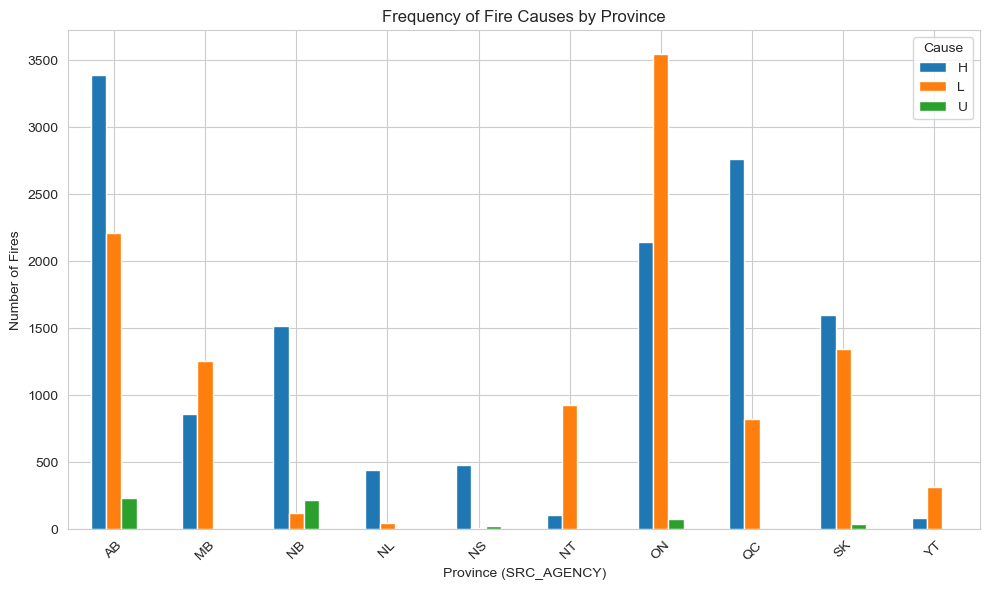

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'SRC_AGENCY' and 'CAUSE', then count
grouped_data = data.groupby(['SRC_AGENCY', 'CAUSE']).size().unstack()

# Plotting
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Frequency of Fire Causes by Province')
plt.xlabel('Province (SRC_AGENCY)')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.legend(title='Cause')
plt.tight_layout()

# Display the plot
plt.show()


## put hands together!

In [35]:
# Unique provinces in the revenue dataset
unique_provinces_revenue = revenue_cleaned['Jurisdiction'].unique()
print("Unique Provinces in Revenue Dataset:", unique_provinces_revenue)

# Unique provinces in the fire dataset
unique_provinces_fire = data['SRC_AGENCY'].unique()
print("Unique Provinces in Fire Dataset:", unique_provinces_fire)


Unique Provinces in Revenue Dataset: ['Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia' 'Quebec'
 'New Brunswick' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia' 'Northwest Territories' 'Yukon']
Unique Provinces in Fire Dataset: ['AB' 'SK' 'MB' 'ON' 'QC' 'NL' 'NB' 'NS' 'YT' 'NT']


In [36]:
# Mapping from abbreviations to full names
province_mapping = {
    'AB': 'Alberta',
    'SK': 'Saskatchewan',
    'MB': 'Manitoba',
    'ON': 'Ontario',
    'QC': 'Quebec',
    'NL': 'Newfoundland and Labrador',
    'NB': 'New Brunswick',
    'NS': 'Nova Scotia',
    'YT': 'Yukon',
    'NT': 'Northwest Territories',
    # Add any other necessary mappings
}

# Apply the mapping to the 'SRC_AGENCY' column in the fire data
data['SRC_AGENCY'] = data['SRC_AGENCY'].map(province_mapping)

# Check the updated unique values in the 'SRC_AGENCY' column
print("Updated Provinces in Fire Dataset:", data['SRC_AGENCY'].unique())


Updated Provinces in Fire Dataset: ['Alberta' 'Saskatchewan' 'Manitoba' 'Ontario' 'Quebec'
 'Newfoundland and Labrador' 'New Brunswick' 'Nova Scotia' 'Yukon'
 'Northwest Territories']


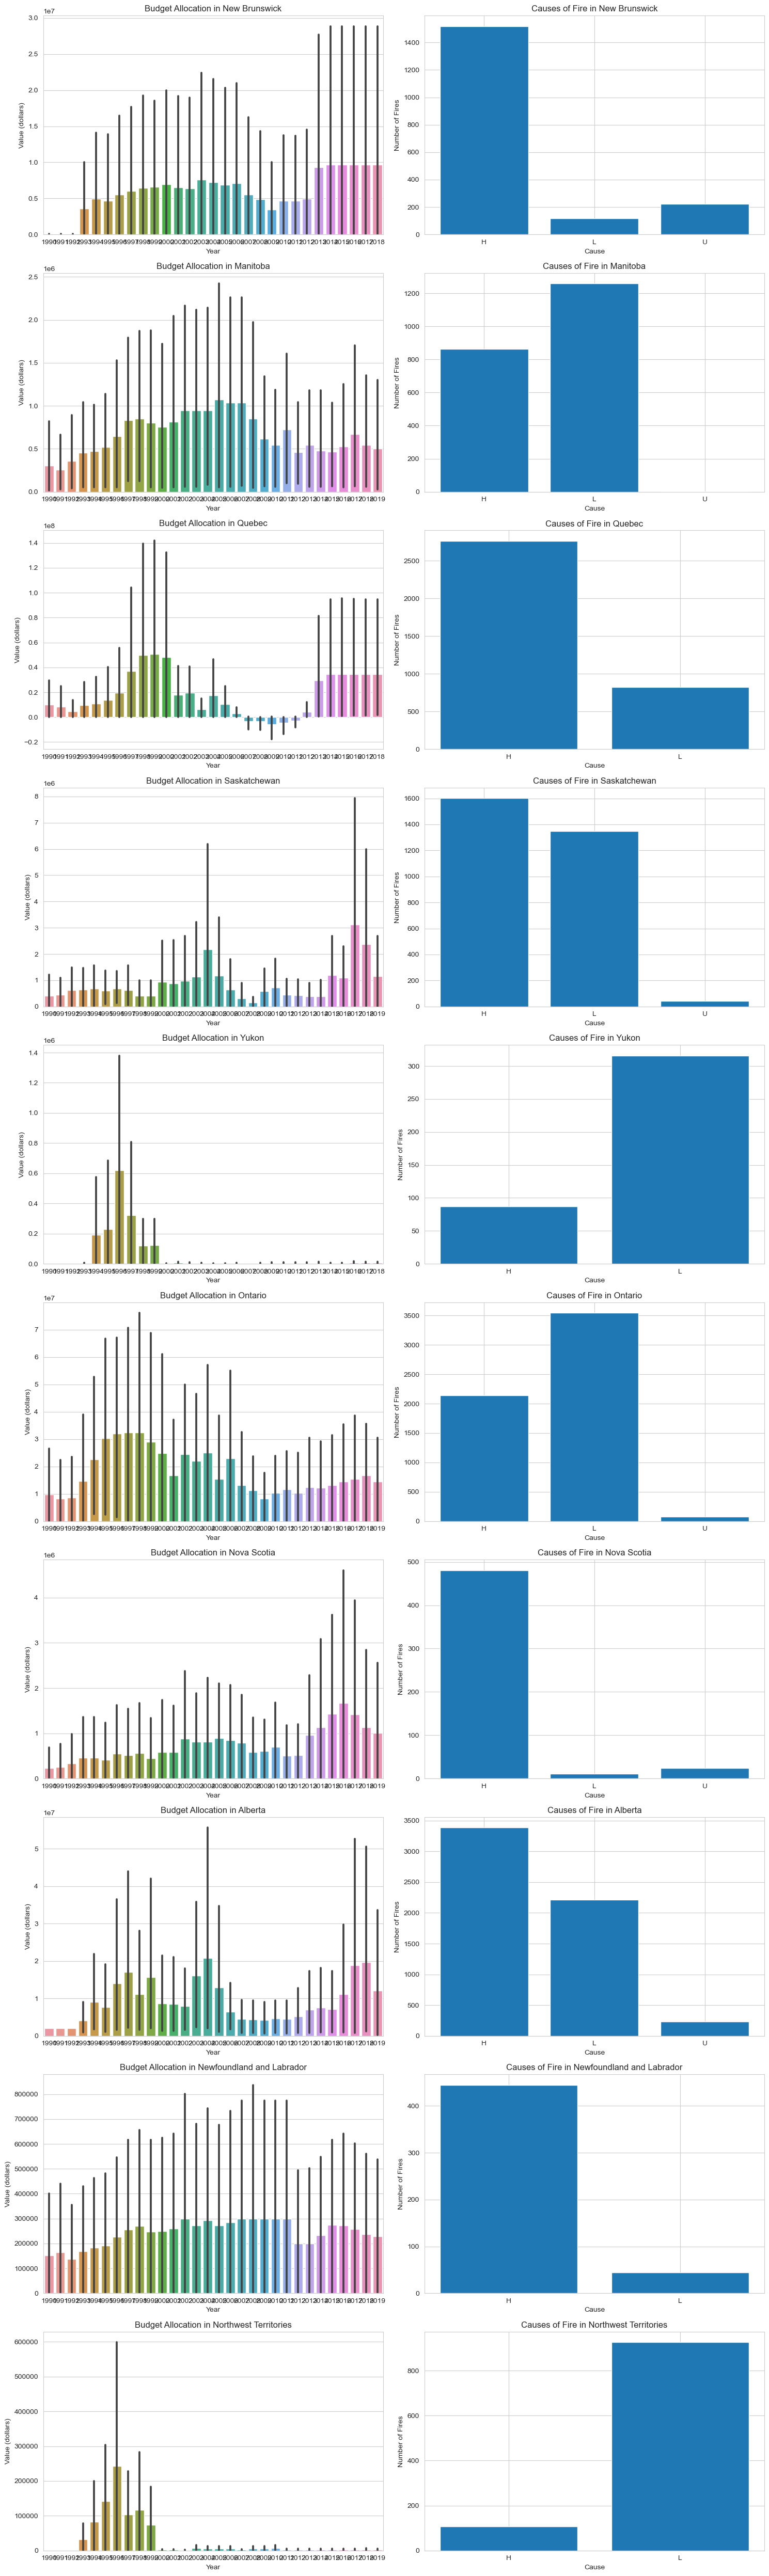

In [37]:
import seaborn as sns

provinces = set(revenue_cleaned['Jurisdiction'].unique()).intersection(set(data['SRC_AGENCY'].unique()))

num_provinces = len(provinces)

# Creating subplots - one row for each province
fig, axes = plt.subplots(nrows=num_provinces, ncols=2, figsize=(15, 5 * num_provinces))

for i, province in enumerate(provinces):
    # Plot Budget Allocation in the first column
    sns.barplot(
        x='Year',
        y='Value (dollars)',
        data=revenue_cleaned[revenue_cleaned['Jurisdiction'] == province],
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f'Budget Allocation in {province}')
    axes[i, 0].set_xlabel('Year')
    axes[i, 0].set_ylabel('Value (dollars)')

    # Plot Causes of Fire in the second column
    province_fire_data = data[data['SRC_AGENCY'] == province].groupby('CAUSE').size()
    axes[i, 1].bar(province_fire_data.index, province_fire_data.values)
    axes[i, 1].set_title(f'Causes of Fire in {province}')
    axes[i, 1].set_xlabel('Cause')
    axes[i, 1].set_ylabel('Number of Fires')

# Adjust layout
plt.tight_layout()
plt.show()


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

provinces = set(revenue_cleaned['Jurisdiction'].unique()).intersection(set(data['SRC_AGENCY'].unique()))
num_provinces = len(provinces)

# Directory where you want to save the plots
save_directory = '/Users/sheidamajidi/Desktop/Fall2023Courses/INSY662/Group Project/Charts/Budget/'
# Create and save a pair of plots for each province
for i, province in enumerate(provinces):
    # Create figure for each pair of plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Plot Budget Allocation in the first subplot
    sns.barplot(
        x='Year',
        y='Value (dollars)',
        data=revenue_cleaned[revenue_cleaned['Jurisdiction'] == province],
        ax=axes[0]
    )
    axes[0].set_title(f'Budget Allocation in {province}')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Value (dollars)')

    # Plot Causes of Fire in the second subplot
    # Assuming 'data' DataFrame has the relevant fire data
    province_fire_data = data[data['SRC_AGENCY'] == province].groupby('CAUSE').size()
    axes[1].bar(province_fire_data.index, province_fire_data.values)
    axes[1].set_title(f'Causes of Fire in {province}')
    axes[1].set_xlabel('Cause')
    axes[1].set_ylabel('Number of Fires')

    # Adjust layout
    plt.tight_layout()

    # Save the current figure
    plot_filename = f"{save_directory}Province_{province}_plots.png"  # Define the plot filename
    plt.savefig(plot_filename)

    # Close the current plot before creating the next one
    plt.close()


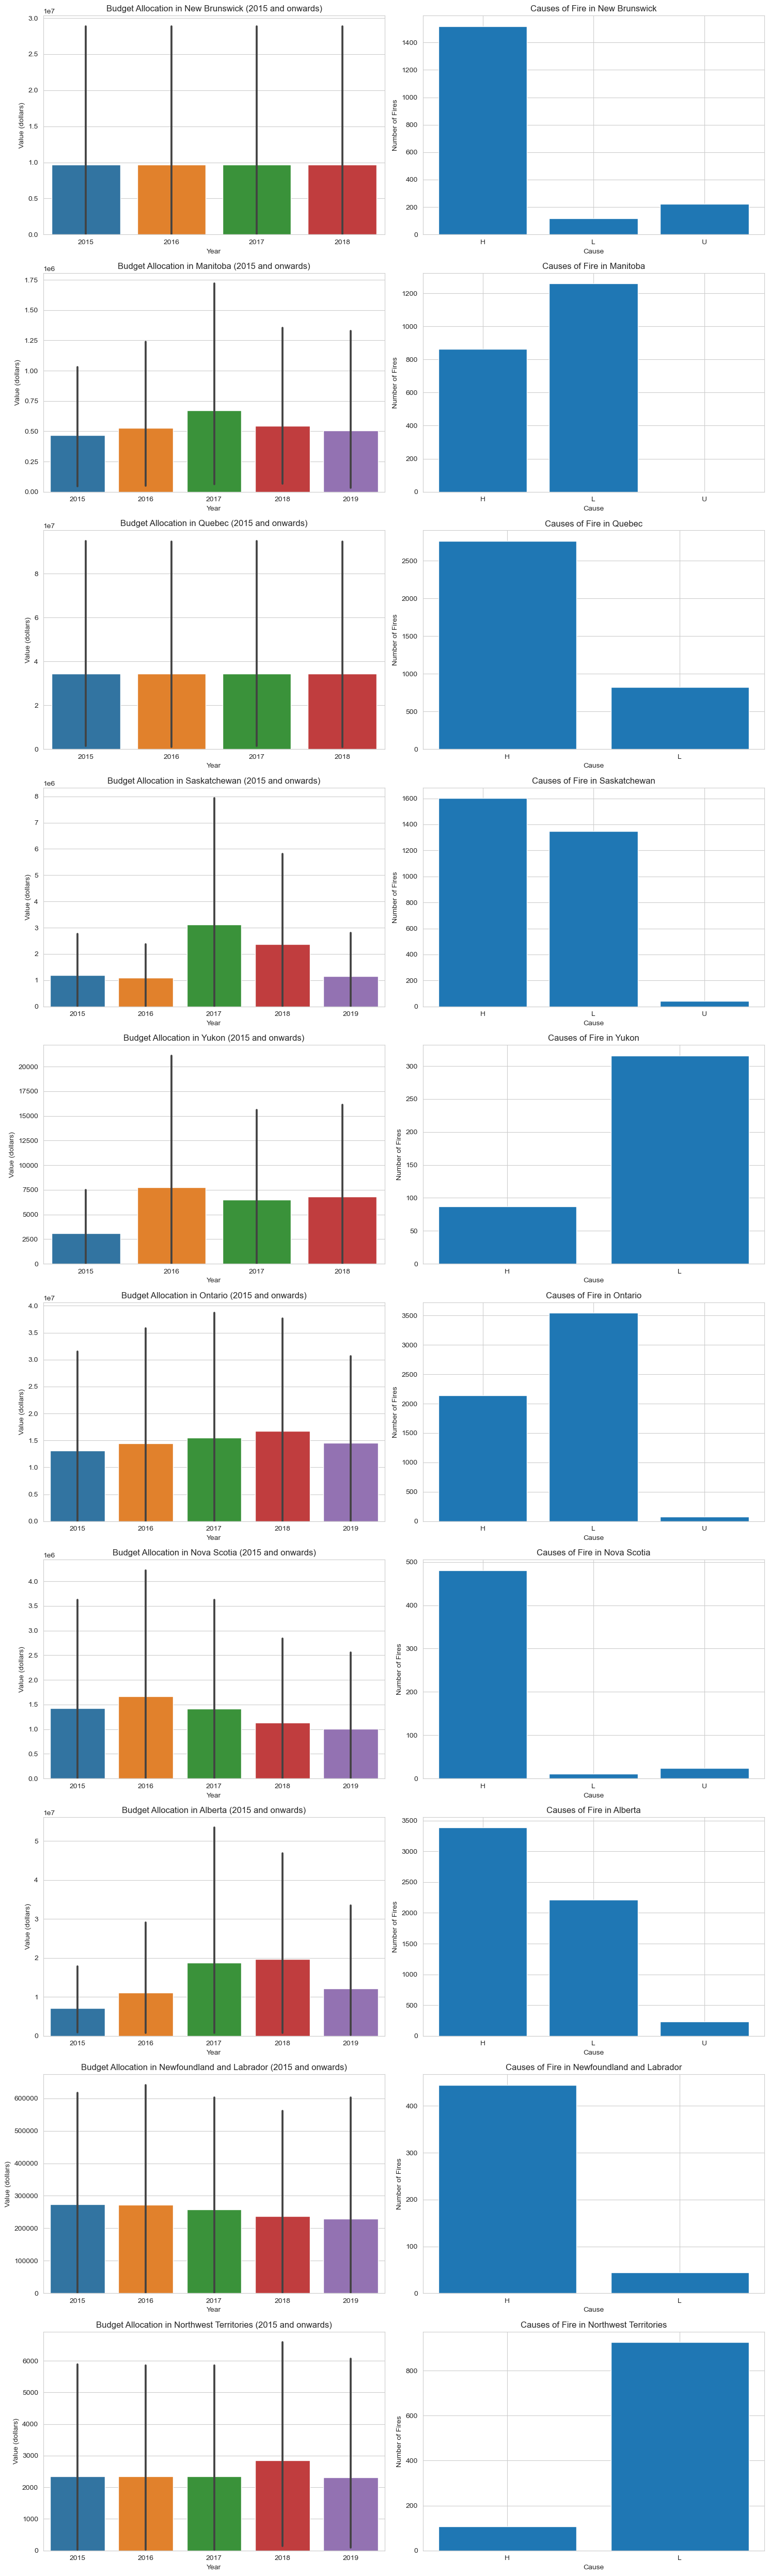

In [38]:
# Creating subplots - one row for each province
fig, axes = plt.subplots(nrows=num_provinces, ncols=2, figsize=(15, 5 * num_provinces))

for i, province in enumerate(provinces):
    # Plot Budget Allocation in the first column (only for years >= 2015)
    sns.barplot(
        x='Year',
        y='Value (dollars)',
        data=revenue_cleaned[(revenue_cleaned['Jurisdiction'] == province) & (revenue_cleaned['Year'] >= 2015)],
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f'Budget Allocation in {province} (2015 and onwards)')
    axes[i, 0].set_xlabel('Year')
    axes[i, 0].set_ylabel('Value (dollars)')

    # Plot Causes of Fire in the second column
    province_fire_data = data[data['SRC_AGENCY'] == province].groupby('CAUSE').size()
    axes[i, 1].bar(province_fire_data.index, province_fire_data.values)
    axes[i, 1].set_title(f'Causes of Fire in {province}')
    axes[i, 1].set_xlabel('Cause')
    axes[i, 1].set_ylabel('Number of Fires')

# Adjust layout
plt.tight_layout()
plt.show()


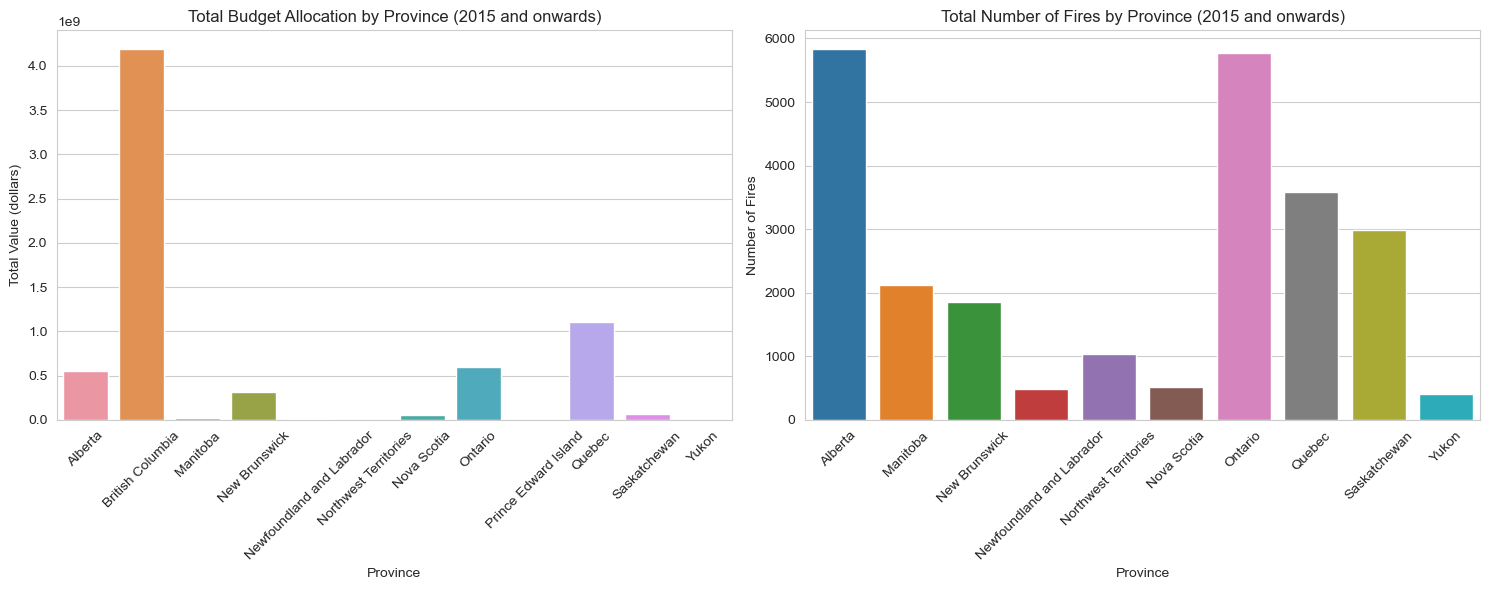

In [39]:
# Filter data for years >= 2015
revenue_filtered = revenue_cleaned[revenue_cleaned['Year'] >= 2015]
fire_data_filtered = data[data['YEAR'] >= 2015]

# Aggregate budget allocation by province
budget_by_province = revenue_filtered.groupby('Jurisdiction')['Value (dollars)'].sum()

# Count the number of fires for each province
fires_by_province = fire_data_filtered.groupby('SRC_AGENCY').size()

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot budget allocation by province
sns.barplot(
    x=budget_by_province.index,
    y=budget_by_province.values,
    ax=axes[0]
)
axes[0].set_title('Total Budget Allocation by Province (2015 and onwards)')
axes[0].set_xlabel('Province')
axes[0].set_ylabel('Total Value (dollars)')
axes[0].tick_params(axis='x', rotation=45)

# Plot number of fires by province
sns.barplot(
    x=fires_by_province.index,
    y=fires_by_province.values,
    ax=axes[1]
)
axes[1].set_title('Total Number of Fires by Province (2015 and onwards)')
axes[1].set_xlabel('Province')
axes[1].set_ylabel('Number of Fires')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape

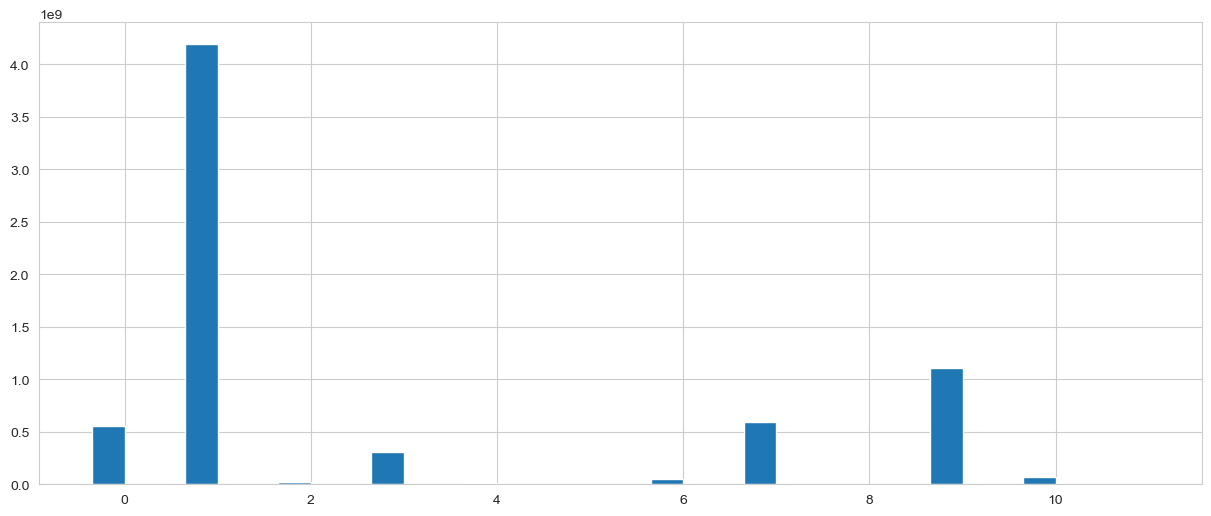

In [40]:
# Filter and aggregate data
budget_by_province = revenue_filtered.groupby('Jurisdiction')['Value (dollars)'].sum()
fires_by_province = fire_data_filtered.groupby('SRC_AGENCY').size()

# Ensure the data is aligned by sorting the indices
budget_by_province = budget_by_province.sort_index()
fires_by_province = fires_by_province.sort_index()

# Prepare data for plotting
provinces = budget_by_province.index
x = np.arange(len(provinces))  # the label locations
width = 0.35  # the width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(15, 6))
rects1 = ax.bar(x - width/2, budget_by_province, width, label='Budget Allocation')
rects2 = ax.bar(x + width/2, fires_by_province, width, label='Number of Fires')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Province')
ax.set_ylabel('Values')
ax.set_title('Budget Allocation and Number of Fires by Province (2015 and onwards)')
ax.set_xticks(x)
ax.set_xticklabels(provinces)
ax.legend()

# Function to add labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to add labels
autolabel(rects1)
autolabel(rects2)

# Adjust layout and display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


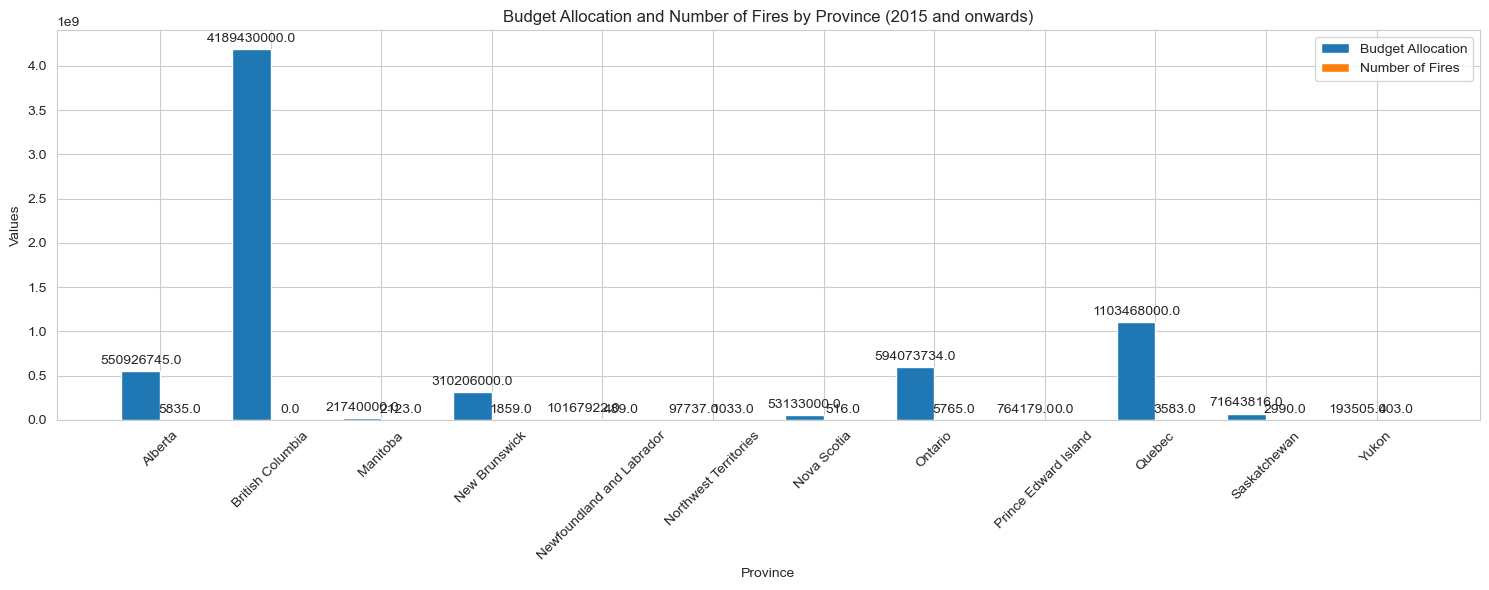

In [41]:
# Create a combined list of provinces
all_provinces = set(revenue_filtered['Jurisdiction'].unique()).union(set(fire_data_filtered['SRC_AGENCY'].unique()))

# Create empty Series for both datasets with all provinces as index
aligned_budget = pd.Series(index=all_provinces, dtype=float)
aligned_fires = pd.Series(index=all_provinces, dtype=float)

# Fill the Series with data from each dataset
for province in all_provinces:
    aligned_budget[province] = revenue_filtered[revenue_filtered['Jurisdiction'] == province]['Value (dollars)'].sum()
    aligned_fires[province] = fire_data_filtered[fire_data_filtered['SRC_AGENCY'] == province].shape[0]

# Replace NaN values with 0
aligned_budget.fillna(0, inplace=True)
aligned_fires.fillna(0, inplace=True)

# Sort the indices
aligned_budget.sort_index(inplace=True)
aligned_fires.sort_index(inplace=True)

# Prepare data for plotting
provinces = aligned_budget.index
x = np.arange(len(provinces))  # the label locations
width = 0.35  # the width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(15, 6))
rects1 = ax.bar(x - width/2, aligned_budget, width, label='Budget Allocation')
rects2 = ax.bar(x + width/2, aligned_fires, width, label='Number of Fires')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Province')
ax.set_ylabel('Values')
ax.set_title('Budget Allocation and Number of Fires by Province (2015 and onwards)')
ax.set_xticks(x)
ax.set_xticklabels(provinces)
ax.legend()

# Function to add labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
